In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('diabetes.csv')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As the number of rows with outcome = 0 (i.e. diabetes negative) and outcome = 1 (i.e. diabetes positive) are significantly different, we use the probability/density while plotting the graphs to ensure no bias is introduced

In [10]:
df[df['Outcome']==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [11]:
df[df['Outcome']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [12]:
len(df[df['Outcome']==0]), len(df[df['Outcome']==1])

(500, 268)

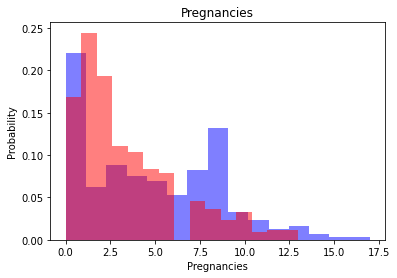

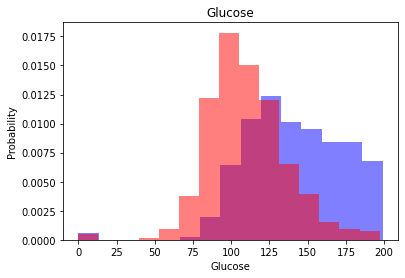

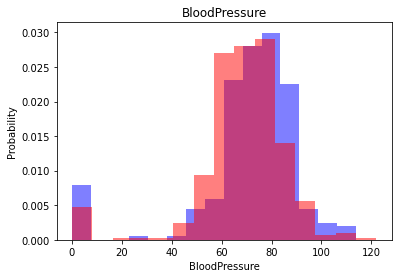

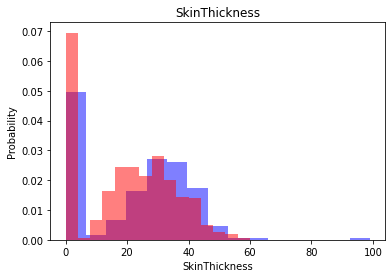

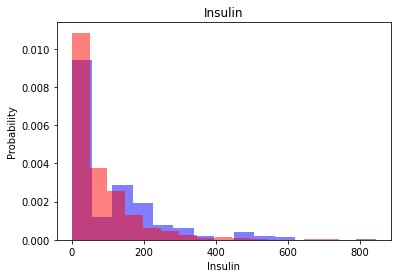

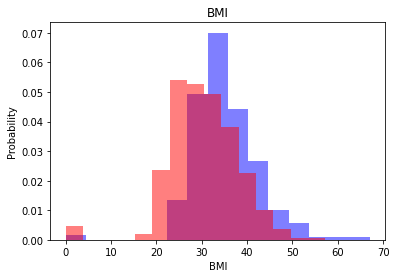

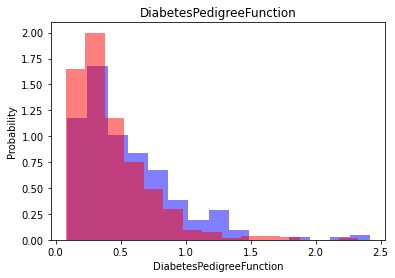

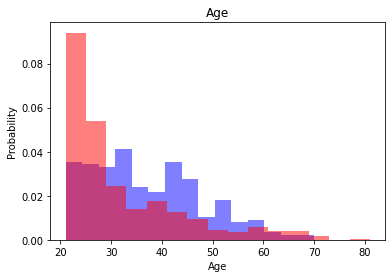

In [13]:
for i in range(len(df.columns[:-1])): # Last column is the output column and will not be used.
  label = df.columns[i]
  #print(label)
  plt.hist(df[df['Outcome']==1][label], color = 'blue', label = 'Diabetes', alpha=0.5, density = True, bins = 15)
  plt.hist(df[df['Outcome']==0][label], color = 'red',label = 'No diabetes', alpha=0.5, density = True, bins = 15)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.show()


In [14]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [15]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [16]:
X.shape, y.shape

((768, 8), (768,))

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [18]:
transformed_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0.0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0.0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0.0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1.0


In [19]:
over = RandomOverSampler()
X, y = over.fit_resample(X,y)
data = np.hstack((X, np.reshape(y,(-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [20]:
transformed_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0
...,...,...,...,...,...,...,...,...,...
995,-1.141852,1.286484,0.356432,2.224559,0.175399,2.691630,0.867148,-0.701198,1.0
996,2.421746,-1.154694,0.149641,0.656358,-0.692891,-0.290972,-0.528147,1.085644,1.0
997,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111,1.0
998,-0.250952,1.724644,0.873409,0.405445,0.661641,0.165937,2.060095,1.596171,1.0


In [21]:
len(transformed_df[transformed_df['Outcome']==0]), len(transformed_df[transformed_df['Outcome']==1])

(500, 500)

In [27]:
# Splitting the data into 
  # 60% -> training
  # 20% -> testing
  # 20% -> Validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 0)
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0) # 50% of the remaining 40% of the original df is split into 2 equal halves

In [22]:
model = tf.keras.Sequential([ 
                             tf.keras.layers.Dense(16, activation="relu"), 
                             tf.keras.layers.Dense(16, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
                             ])

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

Before training the model, if we evaluate the accuracy, we get almost 50% accuracy as the output can be either 0 or 1, so there is a 50/50 chance of the predicted answer being correct.

In [28]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 1s 3ms/step - loss: 0.6783 - accuracy: 0.5733


[0.6782986521720886, 0.5733333230018616]

In [29]:
model.evaluate(X_valid, y_valid)

16/16 [==============================] - 0s 6ms/step - loss: 0.6804 - accuracy: 0.5780


[0.6803659200668335, 0.578000009059906]

In [34]:
model.fit(X_train, y_train, batch_size = 16, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
38/38 [==============================] - 0s 6ms/step - loss: 0.4421 - accuracy: 0.8033 - val_loss: 0.4351 - val_accuracy: 0.7980
Epoch 2/30
38/38 [==============================] - 0s 5ms/step - loss: 0.4404 - accuracy: 0.8017 - val_loss: 0.4338 - val_accuracy: 0.7960
Epoch 3/30
38/38 [==============================] - 0s 6ms/step - loss: 0.4383 - accuracy: 0.8000 - val_loss: 0.4322 - val_accuracy: 0.8000
Epoch 4/30
38/38 [==============================] - 0s 7ms/step - loss: 0.4378 - accuracy: 0.8000 - val_loss: 0.4305 - val_accuracy: 0.7980
Epoch 5/30
38/38 [==============================] - 0s 5ms/step - loss: 0.4359 - accuracy: 0.8067 - val_loss: 0.4292 - val_accuracy: 0.8000
Epoch 6/30
38/38 [==============================] - 0s 6ms/step - loss: 0.4349 - accuracy: 0.8000 - val_loss: 0.4279 - val_accuracy: 0.7980
Epoch 7/30
38/38 [==============================] - 0s 6ms/step - loss: 0.4326 - accuracy: 0.8017 - val_loss: 0.4261 - val_accuracy: 0.8000
Epoch 8/30
38/38 [==

In [35]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8300


[0.39096319675445557, 0.8299999833106995]

After training the model, the accuracy of the model now comes out to be close to 83%